In [2]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 953.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15076 sha256=fb9a9495dcf99c8a0950115cf4f5279660085c8488e47948d9fe31297a6ec332
  Stored in directory: /Users/shikarichacha/Library/Caches/pip/wheels/07/e6/86/f23164d12c3134966614102db8e7956ab359faf7ffd78703ce
Successfully built func-timeout


In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from geneticalgorithm import geneticalgorithm as ga
from sklearn.metrics import mean_squared_error

In [32]:
# Load the dataset from a file (replace 'path/to/your/dataset.csv' with your file path)
file_path = "/Users/shikarichacha/Desktop/Mechanical project/FSW Data for ANN.csv"
df = pd.read_csv(file_path)

In [33]:
df

,Experiment No,Traverse Speed,Rotational Speed,Preheating Temperature,Tensile Strength,Vickers Hardness,Impact Strength
0,1,16,1000,100,46.175,89.33,10.88
1,2,16,1400,150,130.360,230.00,15.33
2,3,16,1800,200,32.160,70.66,10.66
3,4,20,1000,100,45.390,100.66,10.83
4,5,20,1400,150,65.290,137.33,13.33
5,6,20,1800,200,100.240,215.66,15.16
6,7,24,1000,100,66.980,136.66,13.66
7,8,24,1400,150,51.700,180.33,12.50
8,9,24,1800,200,93.130,188.33,14.33


In [34]:
# Separate features and target variables
X = df[['Traverse Speed', 'Rotational Speed', 'Preheating Temperature']].values
y = df[['Tensile Strength', 'Vickers Hardness', 'Impact Strength']].values
print(X,y)

[[  16 1000  100]
 [  16 1400  150]
 [  16 1800  200]
 [  20 1000  100]
 [  20 1400  150]
 [  20 1800  200]
 [  24 1000  100]
 [  24 1400  150]
 [  24 1800  200]] [[ 46.175  89.33   10.88 ]
 [130.36  230.     15.33 ]
 [ 32.16   70.66   10.66 ]
 [ 45.39  100.66   10.83 ]
 [ 65.29  137.33   13.33 ]
 [100.24  215.66   15.16 ]
 [ 66.98  136.66   13.66 ]
 [ 51.7   180.33   12.5  ]
 [ 93.13  188.33   14.33 ]]


In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print(X_train, X_test, y_train, y_test)

[[  20 1800  200]
 [  16 1000  100]
 [  24 1800  200]
 [  16 1800  200]
 [  20 1400  150]
 [  20 1000  100]
 [  24 1000  100]] [[  24 1400  150]
 [  16 1400  150]] [[100.24  215.66   15.16 ]
 [ 46.175  89.33   10.88 ]
 [ 93.13  188.33   14.33 ]
 [ 32.16   70.66   10.66 ]
 [ 65.29  137.33   13.33 ]
 [ 45.39  100.66   10.83 ]
 [ 66.98  136.66   13.66 ]] [[ 51.7  180.33  12.5 ]
 [130.36 230.    15.33]]


In [36]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(scaler,X_train_scaled,X_test_scaled )

StandardScaler() [[ 0.          1.08012345  1.08012345]
 [-1.32287566 -1.08012345 -1.08012345]
 [ 1.32287566  1.08012345  1.08012345]
 [-1.32287566  1.08012345  1.08012345]
 [ 0.          0.          0.        ]
 [ 0.         -1.08012345 -1.08012345]
 [ 1.32287566 -1.08012345 -1.08012345]] [[ 1.32287566  0.          0.        ]
 [-1.32287566  0.          0.        ]]


In [62]:
# Get the weights and bias values for the first hidden layer
hidden_layer_weights, hidden_layer_bias = model.layers[0].get_weights()

# Print the weights and bias values
print("Hidden Layer Weights:")
print(hidden_layer_weights)

print("\nHidden Layer Bias:")
print(hidden_layer_bias)

# Create a DataFrame with the weights and bias values
weights_df = pd.DataFrame(hidden_layer_weights, columns=[f'Weight_{i}' for i in range(hidden_layer_weights.shape[1])])
bias_df = pd.DataFrame(hidden_layer_bias, columns=['Bias'])
hidden_layer_df = pd.concat([weights_df, bias_df], axis=1)

# Save the DataFrame to a CSV file
hidden_layer_df.to_csv('hidden_layer_weights_bias.csv', index=False)

Hidden Layer Weights:
[[ 0.4179861  -0.01711307  0.44799164 -0.25933993  0.44618964  0.47950163
   0.2825209  -0.27933004  0.5010612   0.27214056 -0.3810688   0.1002604
   0.30535844 -0.3526452   0.20648025  0.56272215 -0.5115847   0.44478518
   0.25841367 -0.08216463 -0.2782842   0.17658801  0.41937602 -0.25498068
  -0.27009165 -0.15951289  0.30288246  0.4674385  -0.01147341  0.02340692
   0.48925525  0.17436525 -0.4506085   0.22861183  0.08689348  0.00627171
   0.30066556  0.34286967 -0.3371157  -0.20113006  0.511976   -0.1713363
  -0.18062465 -0.11271428 -0.21792088  0.5493679  -0.2734907   0.5195282
   0.29718718 -0.20764485  0.01824806  0.23552176 -0.22635604  0.3723758
   0.17559247  0.2908035   0.442734   -0.2547893   0.22887161  0.23038018
   0.00516572 -0.36500505  0.5389139   0.438779  ]
 [ 0.4391248   0.49527106  0.4401427  -0.35824874  0.49497133  0.5323856
   0.23325843 -0.50757706  0.43569884  0.38682726 -0.2623628   0.44011074
   0.43875203 -0.26991636  0.4823622   0.407

In [67]:
from tensorflow.keras.layers import Input

# Initialize the ANN
model = Sequential()
model.add(Input(shape=(X_train.shape[1], )))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=3, activation='linear'))  # 3 output neurons for TS, MH, and GS
model.compile(optimizer='adam', loss='mean_squared_error')

print(model)

<Sequential name=sequential_4, built=True>


In [41]:
# Train the ANN
history = model.fit(X_train_scaled, y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=0)
print(history)

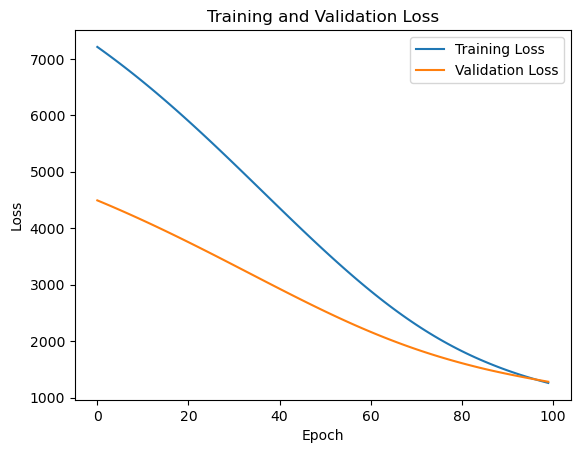

In [42]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [44]:
# Evaluate the model
train_score = model.evaluate(X_train_scaled, y_train)
test_score = model.evaluate(X_test_scaled, y_test)
print("Training Score (MSE):", train_score)
print("Testing Score (MSE):", test_score)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1249.6453
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8453.2773
Training Score (MSE): 1249.645263671875
Testing Score (MSE): 8453.27734375


In [47]:
# Show predictions
y_pred = model.predict(X_test_scaled)

print(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[64.627525 90.677475 10.017377]
 [33.431065 48.324635  4.954858]]


 The best solution found:                                                                           
 [844.  54.  17.   5.]

 Objective function:
 -297.70318637049326


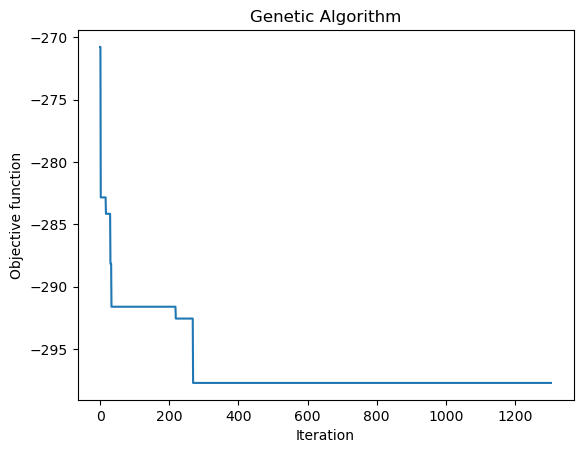

In [24]:
# Initialize and run GA
ga_model = ga(function=objective_function, dimension=4, variable_type='int', variable_boundaries=varbound)
ga_model.run()
print(ga_model)

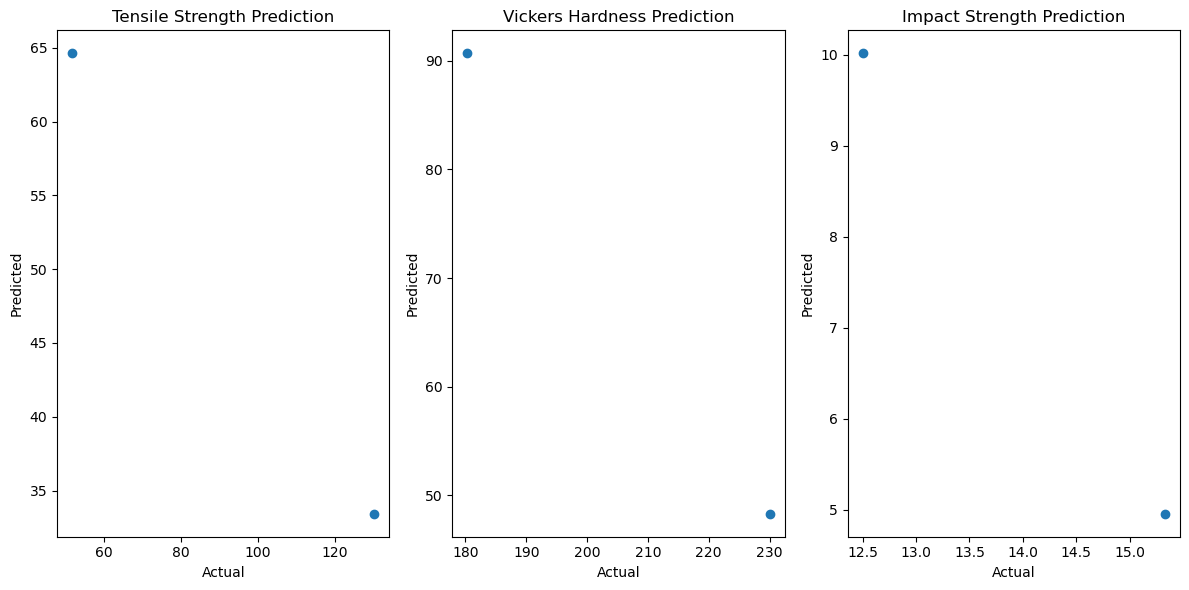

In [48]:
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test[:, i], y_pred[:, i])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{df.columns[-3:][i]} Prediction')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


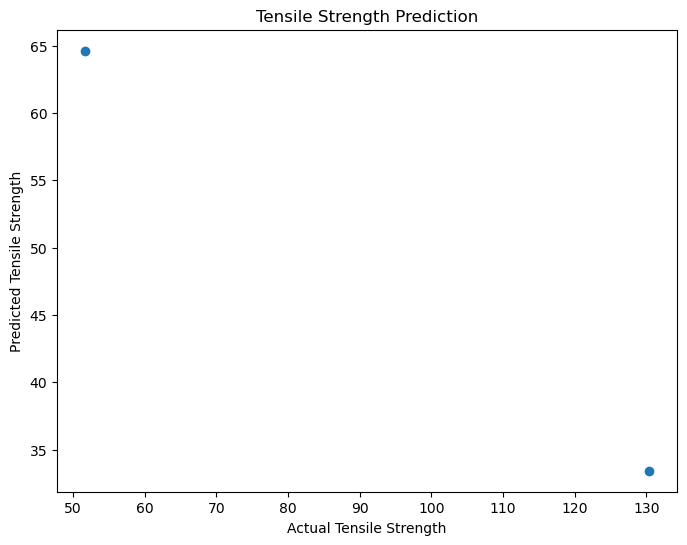

In [52]:
# Show predictions
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test[:, 0], y_pred[:, 0])  # Ensure both y_test and y_pred have the same shape
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Tensile Strength Prediction')
plt.show()

In [53]:
# Print the optimal parameters
print("Optimal Parameters:")
print("Tool Rotational Speed:", optimal_params[0])
print("Welding Speed:", optimal_params[1])
print("Shoulder Diameter:", optimal_params[2])
print("Pin Diameter:", optimal_params[3])


Optimal Parameters:
Tool Rotational Speed: 844.0
Welding Speed: 54.0
Shoulder Diameter: 17.0
Pin Diameter: 5.0


In [54]:
# Evaluate the model with optimal parameters
optimal_tool_rot_speed = optimal_params[0]
optimal_welding_speed = optimal_params[1]
optimal_shoulder_diameter = optimal_params[2]
optimal_pin_diameter = optimal_params[3]

print(optimal_tool_rot_speed,optimal_welding_speed,optimal_shoulder_diameter,optimal_pin_diameter)

844.0 54.0 17.0 5.0


In [29]:
# Scale the optimal parameters
optimal_params_scaled = scaler.transform([[optimal_tool_rot_speed, optimal_welding_speed, optimal_shoulder_diameter, optimal_pin_diameter]])
print(optimal_params_scaled)

[[342.5203157   11.24444307  -3.73452683  -3.132358  ]]


In [55]:
# Evaluate the model using the optimal parameters and print the scores
train_score = model.evaluate(X_train_scaled, y_train)
test_score = model.evaluate(X_test_scaled, y_test)
print("Training Score:", train_score)
print("Testing Score:", test_score)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1249.6453
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8453.2773
Training Score: 1249.645263671875
Testing Score: 8453.27734375


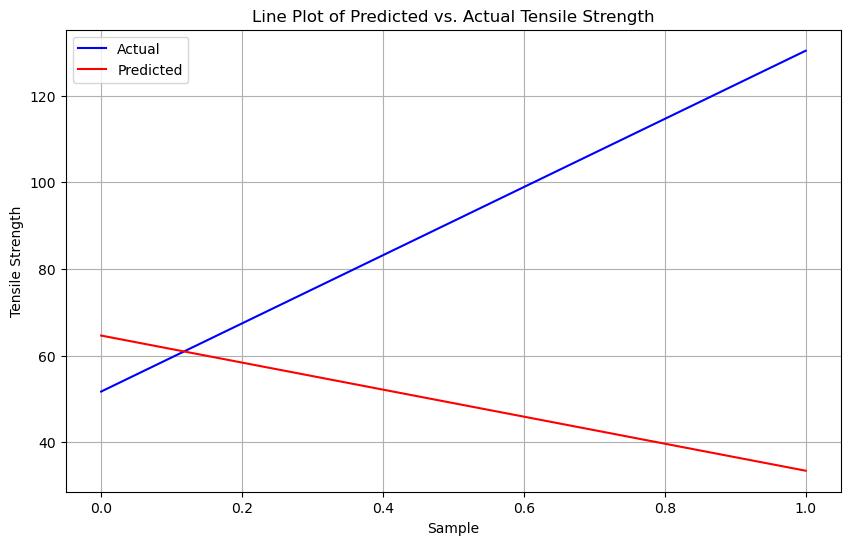

In [57]:
# Line plot
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 0], color='blue', label='Actual')
plt.plot(y_pred[:, 0], color='red', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Tensile Strength')
plt.title('Line Plot of Predicted vs. Actual Tensile Strength')
plt.legend()
plt.grid(True)
plt.show()

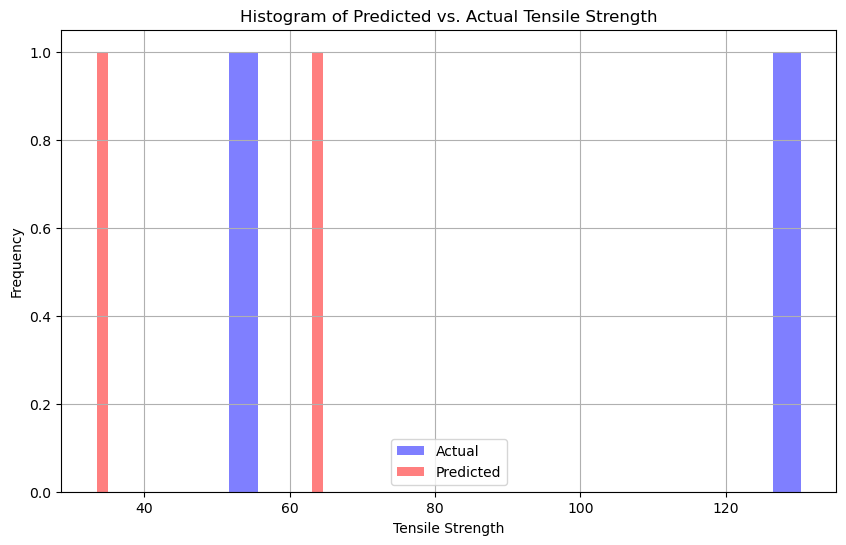

In [58]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(y_test[:, 0], bins=20, alpha=0.5, color='blue', label='Actual')
plt.hist(y_pred[:, 0], bins=20, alpha=0.5, color='red', label='Predicted')
plt.xlabel('Tensile Strength')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted vs. Actual Tensile Strength')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
# Normalize the experimental results
y_test_scaled = scaler.transform(y_test)

# Create a DataFrame for the normalized experimental results
y_test_df = pd.DataFrame(y_test_scaled, columns=['Normalized Tensile Strength', 'Normalized Vickers Hardness', 'Normalized Impact Strength'])

# Create a DataFrame for the ANN-based predicted results
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted Tensile Strength', 'Predicted Vickers Hardness', 'Predicted Impact Strength'])

# Concatenate the DataFrames
results_df = pd.concat([y_test_df, y_pred_df], axis=1)

# Save the results to a CSV file
results_df.to_csv('normalized_results.csv', index=False)

# Display the results
print(results_df)


   Normalized Tensile Strength  Normalized Vickers Hardness  \
0                    10.483790                    -3.293485   
1                    36.498139                    -3.159361   

   Normalized Impact Strength  Predicted Tensile Strength  \
0                   -2.970339                   64.627525   
1                   -2.909204                   33.431065   

   Predicted Vickers Hardness  Predicted Impact Strength  
0                   90.677475                  10.017377  
1                   48.324635                   4.954858  


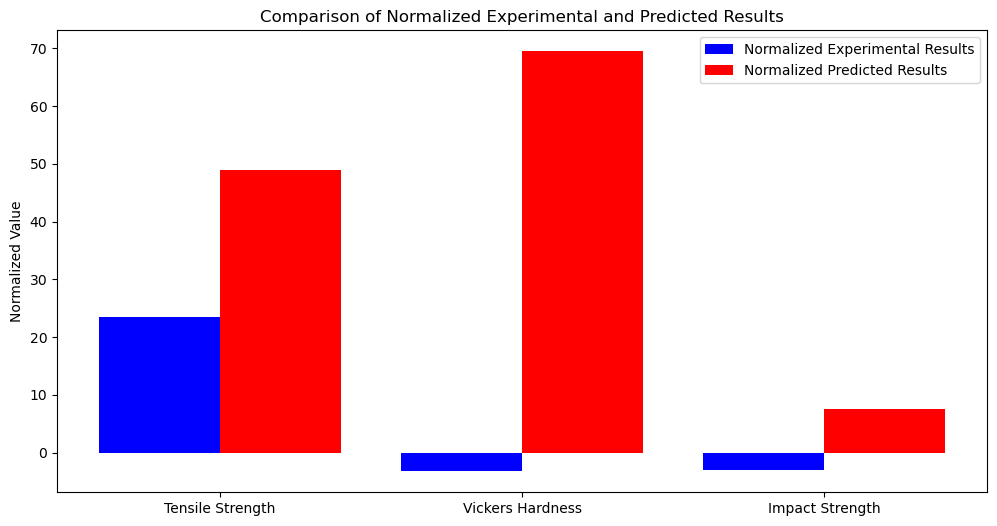

In [64]:
# Create a bar graph comparing the normalized experimental and predicted results
plt.figure(figsize=(12, 6))

# Plot the normalized experimental results
plt.bar([0.8, 1.8, 2.8], y_test_scaled.mean(axis=0), width=0.4, label='Normalized Experimental Results', color='b')

# Plot the ANN-based predicted results
plt.bar([1.2, 2.2, 3.2], y_pred.mean(axis=0), width=0.4, label='Normalized Predicted Results', color='r')

plt.xticks([1, 2, 3], ['Tensile Strength', 'Vickers Hardness', 'Impact Strength'])
plt.ylabel('Normalized Value')
plt.title('Comparison of Normalized Experimental and Predicted Results')
plt.legend()
plt.show()

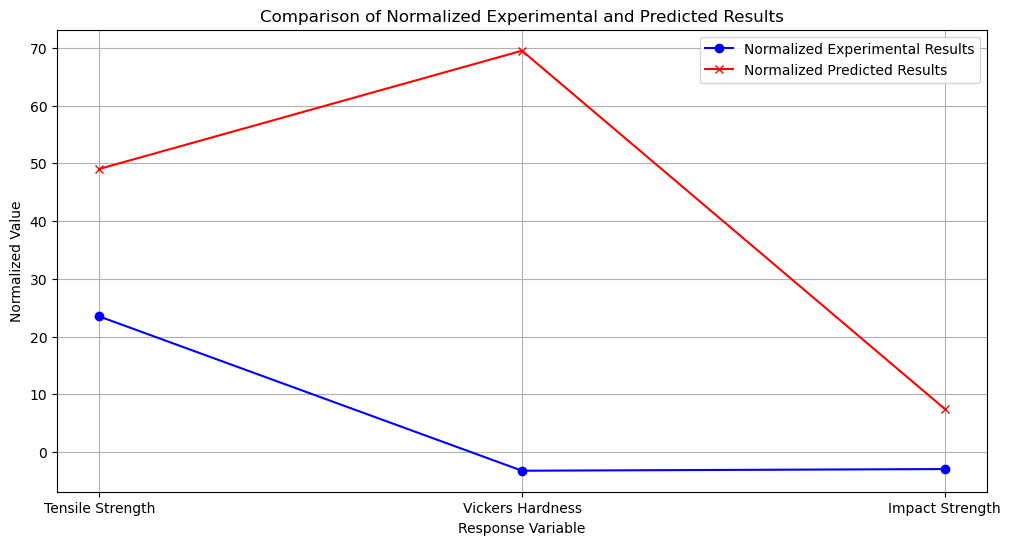

In [65]:
import matplotlib.pyplot as plt

# Create a line graph comparing the normalized experimental and predicted results
plt.figure(figsize=(12, 6))

# Plot the normalized experimental results
plt.plot(['Tensile Strength', 'Vickers Hardness', 'Impact Strength'], y_test_scaled.mean(axis=0), marker='o', label='Normalized Experimental Results', color='b')

# Plot the ANN-based predicted results
plt.plot(['Tensile Strength', 'Vickers Hardness', 'Impact Strength'], y_pred.mean(axis=0), marker='x', label='Normalized Predicted Results', color='r')

plt.xlabel('Response Variable')
plt.ylabel('Normalized Value')
plt.title('Comparison of Normalized Experimental and Predicted Results')
plt.legend()
plt.grid(True)
plt.show()


# TEST

In [66]:
def mymulti(X):
    # Define the objective function values for TS, MH, and GS
    TS = X[0]  # Assuming X[0] represents the parameter related to TS
    MH = X[1]  # Assuming X[1] represents the parameter related to MH
    GS = X[2]  # Assuming X[2] represents the parameter related to GS

    # Calculate the objective function values
    f_TS = 1  # Example calculation for TS
    f_MH = 1  # Example calculation for MH
    f_GS = 1  # Example calculation for GS

    # Return the objective function values as a tuple
    return f_TS, f_MH, f_GS

# Example usage
X = [1, 2, 3]  # Example values for the parameters
f_TS, f_MH, f_GS = mymulti(X)
print(f"TS: {f_TS}, MH: {f_MH}, GS: {f_GS}")


TS: 1, MH: 1, GS: 1


In [69]:
# Initialize the ANN
model = Sequential()

# Add the input layer and the first hidden layer (4 input nodes, 5 nodes in hidden layer)
model.add(Dense(units=5, activation='relu', input_shape=(4,)))

# Add the output layer (1 node for the output)
model.add(Dense(units=1, activation='linear'))

# Compile the ANN
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the summary of the model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 5)                 │         25 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_15 (Dense)                │ (None, 1)                 │          6 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Assuming y_pred contains the predicted results for TS, MH, and GS

# Define a function to suggest solutions based on the predicted values
def suggest_solutions(ts, mh, gs):
    solutions = []
    if ts > 0.5:  # Adjust this threshold as needed
        solutions.append("Increase the Traverse Speed")
    if mh > 0.5:  # Adjust this threshold as needed
        solutions.append("Increase the Rotational Speed")
    if gs > 0.5:  # Adjust this threshold as needed
        solutions.append("Increase the Preheating Temperature")
    return solutions

# Check the shape of y_pred
if len(y_pred) == 1:
    # If y_pred is a single prediction, reshape it to match the expected shape
    y_pred = y_pred.reshape(1, -1)

# Use the function to suggest solutions based on the predicted values
suggested_solutions = suggest_solutions(y_pred[0][0], y_pred[0][1], y_pred[0][2])

# Print the suggested solutions
print("Suggested Solutions:")
for solution in suggested_solutions:
    print(solution)


Suggested Solutions:
Increase the Traverse Speed
Increase the Rotational Speed
Increase the Preheating Temperature


In [74]:
# Load the dataset from a file (replace 'path/to/your/dataset.csv' with your file path)
file_path = "/Users/shikarichacha/Desktop/Mechanical project/normalized_results.csv"
af = pd.read_csv(file_path)
af

,Normalized Tensile Strength,Normalized Vickers Hardness,Normalized Impact Strength,Predicted Tensile Strength,Predicted Vickers Hardness,Predicted Impact Strength
0,10.483790,-3.293485,-2.970339,64.627525,90.677475,10.017377
1,36.498139,-3.159361,-2.909204,33.431065,48.324635,4.954858


In [75]:
# Load the dataset from a file (replace 'path/to/your/dataset.csv' with your file path)
file_path = "/Users/shikarichacha/Desktop/Mechanical project/hidden_layer_weights_bias.csv"
af = pd.read_csv(file_path)
af

,Weight_0,Weight_1,Weight_2,Weight_3,Weight_4,Weight_5,Weight_6,Weight_7,Weight_8,Weight_9,...,Weight_55,Weight_56,Weight_57,Weight_58,Weight_59,Weight_60,Weight_61,Weight_62,Weight_63,Bias
0,0.417986,-0.017113,0.447992,-0.259340,0.446190,0.479502,0.282521,-0.279330,0.501061,0.272141,...,0.290803,0.442734,-0.254789,0.228872,0.230380,0.005166,-0.365005,0.538914,0.438779,0.285625
1,0.439125,0.495271,0.440143,-0.358249,0.494971,0.532386,0.233258,-0.507577,0.435699,0.386827,...,0.254877,0.415079,-0.112637,0.201310,0.146351,0.146963,-0.357823,0.500179,0.370171,0.235266
2,0.251162,0.162726,0.465719,-0.459681,0.184194,0.087096,0.409385,-0.263173,0.224618,0.288539,...,0.530525,0.249691,-0.456107,0.532136,0.487446,-0.155619,-0.363378,0.234374,0.032062,0.286587
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.285811
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.264236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275650
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.021947
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.299557
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.281094
